In [12]:
import pandas as pd
import random
import numpy as np
import pickle
import glob
import os
import re
import math
from operator import itemgetter
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
# prep csvs for running David Feldman's NGS/PEAR analysis script

In [49]:
pool_paths = glob.glob('/home/ilutz/BINDERS_RL/chip/05_to_order/final_sequences_pool_*.tab*') + \
             glob.glob('/home/svt4/research_project/helix_binders/groove_scaffold/chip/05_to_order/final_sequences_pool_*.tab')

pool_paths = sorted(pool_paths,key=lambda x: int(x.split('_')[-1][:-4]))

In [9]:
with open('/net/scratch/ilutz/miseq/designs.csv','w') as designs_csv:
    designs_csv.write('subpool,design_name,insert_dna\n')
    for path in pool_paths:
        subpool = sort_func(path)
        with open(path,'r') as subpool_file:
            for line in subpool_file:
                design_name = line.split(' ')[0]
                insert_dna = line.split(' ')[1]
                designs_csv.write(f'subpool_{subpool},{design_name},{insert_dna}')

In [10]:
runs = glob.glob('/net/scratch/ilutz/miseq/fastq/*R1*')

In [11]:
with open('/net/scratch/ilutz/miseq/samples.csv','w') as file:
    file.write('sample,fastq_name,adapter_5,adapter_3\n')
    for run in runs:
        sample_name = run.split('/')[-1].split('_L001_')[0]
        file.write(f'{sample_name},{sample_name},GGGTCGGCTTCGCATATG,CTCGAGGGTGGAGGTTCC\n') #petcon

In [ ]:
# look at results

In [14]:
final_df = load_obj('/home/ilutz/BINDERS_RL/chip/final_chip_order_df')

In [26]:
rl_tg_map = {}
for des in final_df.iterrows():
    rl_tg_map[des[1]['name']] = des[1]['target']

In [131]:
def map_to_tg(des_name):
    if des_name[:5] == 'build':
        return rl_tg_map[des_name]
    else:
        return des_name.split('_')[-1]

In [85]:
results_paths = glob.glob('results/*')
results_paths = sorted(results_paths, key=lambda x: int(x.split('_')[-1].split('.')[0][1:]))

In [108]:
results_paths

['results/Naive-167_S1.matched.csv',
 'results/Expression-sort_S2.matched.csv',
 'results/covstem-1uM_S3.matched.csv',
 'results/covstem-100nMM_S4.matched.csv',
 'results/NeuroY-100nM_S5.matched.csv',
 'results/NeuroY-10nM_S6.matched.csv',
 'results/NeuroY-1nM_S7.matched.csv',
 'results/glucagon-100nM_S8.matched.csv',
 'results/glucagon-10nM_S9.matched.csv',
 'results/PTH-500nM_S10.matched.csv',
 'results/PTH-100nM_S11.matched.csv',
 'results/GLP1-100nM_S12.matched.csv',
 'results/GIP-1nM_S13.matched.csv']

In [200]:
query_num = 2 # S number
query_num -= 1
print(results_paths[query_num])

subpools = {}
with open(results_paths[query_num],'r') as file:
    for lnd,line in enumerate(file):
        if lnd > 0:
            splt = line.split(',')
            subpool = splt[6]
            if subpool not in subpools:
                subpools[subpool] = 0
            else:
                subpools[subpool] += int(splt[1])

results/Expression-sort_S2.matched.csv


In [201]:
#sns.lineplot(x=[x+1 for x in range(len(subpools))],y=reversed(sorted([subpools[x] for x in subpools])))

all_designs = {}
for path in pool_paths:
    with open(path,'r') as subpool_file:
        for line in subpool_file:
            design_name = line.split(' ')[0]
            all_designs[design_name] = []

present = {}
with open(results_paths[query_num],'r') as file:
    for lnd,line in enumerate(file):
        if lnd > 0:
            splt = line.split(',')
            if splt[7] not in present:
                present[splt[7]] = int(splt[1])
            else:
                present[splt[7]] += int(splt[1])
present = dict(reversed(sorted(present.items(), key=lambda x:x[1])))

21117
10704


<AxesSubplot:>

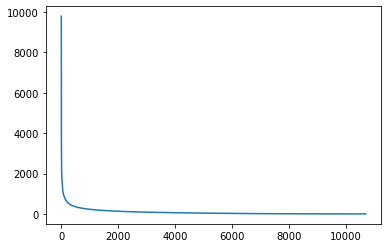

In [202]:
print(len(all_designs))
print(len(present))

sns.lineplot(x=[x+1 for x in range(len(present))][1:],y=[present[x] for x in present][1:])

In [194]:
for top_num in range(10):
    print([x for x in present][top_num])
    print(present[[x for x in present][top_num]])
    print(map_to_tg([x for x in present][top_num]))
    if [x for x in present][top_num] in sanger_names:
        print('> Sanger')
    print('')

buildv10_0.2473_1.0_60.92_1182.9_2.648_54.44_0.9999_000000000_0001_0001_3_0001_0001.pdb
29219
glucagon_1


25557


buildf_0.1917_1.0_41.84_1358.1_2.409_53.66_0.9809_000000000_0001_5_0001.pdb
24317
glucagon_1

buildf_0.2048_1.0_49.00_1261.4_2.251_53.67_0.3366_000000000_0001_mpnn_2_0001.pdb
10089
neuropeptideY_1

buildv10_0.1808_1.0_56.53_1426.3_2.309_56.23_0.6780_000000000_0001_0002_2_0001_0001.pdb
9039
PTH_1

build_0.238805_1.0_43.54101_794.3200_7999.907_000000000_0001_4_0001.pdb
7314
APOE_1

3h_16_2.621_8.292_0001_0001_000000000_0001_2_0001_pred_IR_APOE
7259
APOE

buildf_0.2282_1.0_66.46_1604.3_2.221_55.22_0.9999_000000000_0001_0002_5_0001_0002.pdb
7248
PTH_1

buildf_0.2571_1.0_42.84_1136.1_2.673_51.21_0.9999_000000000_0001_mpnn_2_0001.pdb
6801
GLP1_1

buildv10_0.25_1.0_42.69_922.26_2.512_60.80_0.9999_000000000_0001_0002_mpnn_4_0001.pdb
6019
GIP_1



In [182]:
# covstem
# buildf_0.2235_1.0_54.15_1230.1_2.230_55.01_0.9999_000000000_0001_0001_2_0001.pdb (glucagon)

# PTH
# build2_0.265957_1.0_45.07470_1016.110_4986.671_000000000_0001_mpnn_1_0001.pdb (GIP)
# buildf_0.2345_1.0_45.61_1234.8_2.309_53.89_0.9999_000000000_0001_4_0001.pdb (glucagon)

# glucagon
# 3h_19_1.728_9.022_0001_0001_000000000_0001_2_0001_pred_RR_GLP1

# GLP1
# buildf_0.2261_1.0_43.0_1324.5_2.198_56.42_0.9999_000000000_0001.pdb (glucagon)
# build4_0.185567_1.0_45.69677_1231.275_7999.413_000000000_0001_5_0001.pdb (GIP)
# buildf_0.2235_1.0_54.15_1230.1_2.230_55.01_0.9999_000000000_0001_0001_2_0001.pdb (glucagon)

# GIP
# buildf_0.2023_1.0_56.99_1021.4_2.265_55.74_0.3581_000000000_0001_5_0001.pdb (GLP1)
# build3_0.208333_1.0_57.30859_1161.784_115.6245_000000000_0001_0002_mpnn_2_0001.pdb (GLP1)
# buildf_0.2619_1.0_57.69_979.50_2.296_57.03_0.1453_000000000_0001_4_0001.pdb (neuropeptideY)

# neuropeptideY
# build4_0.202531_1.0_31.22949_785.6641_1301.901_000000000_0001_mpnn_0_0001.pdb (APOE)
# build_0.202898_1.0_37.53466_844.6346_1593.176_000000000_0001.pdb (APOE)
# 3h_16_2.621_8.292_0001_0001_000000000_0001_4_0001_pred_IR_APOE
# buildf_0.2346_1.0_64.92_1001.4_2.195_54.06_0.9999_000000000_0001_mpnn_3_0001.pdb (GIP)

In [98]:
sanger_names = ['buildf_0.2235_1.0_54.15_1230.1_2.230_55.01_0.9999_000000000_0001_0001_2_0001.pdb',
               'build2_0.265957_1.0_45.07470_1016.110_4986.671_000000000_0001_mpnn_1_0001.pdb',
               'buildf_0.2345_1.0_45.61_1234.8_2.309_53.89_0.9999_000000000_0001_4_0001.pdb',
               'buildf_0.2261_1.0_43.0_1324.5_2.198_56.42_0.9999_000000000_0001.pdb',
               'build4_0.185567_1.0_45.69677_1231.275_7999.413_000000000_0001_5_0001.pdb',
               'buildf_0.2235_1.0_54.15_1230.1_2.230_55.01_0.9999_000000000_0001_0001_2_0001.pdb',
               'buildf_0.2023_1.0_56.99_1021.4_2.265_55.74_0.3581_000000000_0001_5_0001.pdb',
               'build3_0.208333_1.0_57.30859_1161.784_115.6245_000000000_0001_0002_mpnn_2_0001.pdb',
               'buildf_0.2619_1.0_57.69_979.50_2.296_57.03_0.1453_000000000_0001_4_0001.pdb',
               'build4_0.202531_1.0_31.22949_785.6641_1301.901_000000000_0001_mpnn_0_0001.pdb',
               'build_0.202898_1.0_37.53466_844.6346_1593.176_000000000_0001.pdb',
               'buildf_0.2346_1.0_64.92_1001.4_2.195_54.06_0.9999_000000000_0001_mpnn_3_0001.pdb',
               '3h_19_1.728_9.022_0001_0001_000000000_0001_2_0001_pred_RR_GLP1',
               '3h_16_2.621_8.292_0001_0001_000000000_0001_4_0001_pred_IR_APOE']

In [132]:
for n in sanger_names:
    print(n)
    try:
        print(present[n])
    except:
        print(0)

buildf_0.2235_1.0_54.15_1230.1_2.230_55.01_0.9999_000000000_0001_0001_2_0001.pdb
0
build2_0.265957_1.0_45.07470_1016.110_4986.671_000000000_0001_mpnn_1_0001.pdb
14
buildf_0.2345_1.0_45.61_1234.8_2.309_53.89_0.9999_000000000_0001_4_0001.pdb
14
buildf_0.2261_1.0_43.0_1324.5_2.198_56.42_0.9999_000000000_0001.pdb
2704
build4_0.185567_1.0_45.69677_1231.275_7999.413_000000000_0001_5_0001.pdb
397396
buildf_0.2235_1.0_54.15_1230.1_2.230_55.01_0.9999_000000000_0001_0001_2_0001.pdb
0
buildf_0.2023_1.0_56.99_1021.4_2.265_55.74_0.3581_000000000_0001_5_0001.pdb
150
build3_0.208333_1.0_57.30859_1161.784_115.6245_000000000_0001_0002_mpnn_2_0001.pdb
0
buildf_0.2619_1.0_57.69_979.50_2.296_57.03_0.1453_000000000_0001_4_0001.pdb
0
build4_0.202531_1.0_31.22949_785.6641_1301.901_000000000_0001_mpnn_0_0001.pdb
0
build_0.202898_1.0_37.53466_844.6346_1593.176_000000000_0001.pdb
0
buildf_0.2346_1.0_64.92_1001.4_2.195_54.06_0.9999_000000000_0001_mpnn_3_0001.pdb
0
3h_19_1.728_9.022_0001_0001_000000000_0001_2_000

In [237]:
expressed_names = {}
expressed_cutoff = 10
#print(results_paths[1])
with open(results_paths[1],'r') as file:
    for lnd,line in enumerate(file):
        if lnd > 0:
            splt = line.split(',')
            if splt[7] not in expressed_names and int(splt[1]) > expressed_cutoff:
                expressed_names[splt[7]] = True

binding_names = {}
binding_cutoff = 1000
for num in range(2,13):
    #print(results_paths[num])
    with open(results_paths[num],'r') as file:
        for lnd,line in enumerate(file):
            if lnd > 0:
                splt = line.split(',')
                if splt[7] not in binding_names and int(splt[1]) > binding_cutoff:
                    binding_names[splt[7]] = True

expressed = final_df[final_df['name'].isin(expressed_names)]
binding = final_df[final_df['name'].isin(binding_names)]
print(len(final_df))
print(len(expressed))
print(len(binding))

14125
5810
111


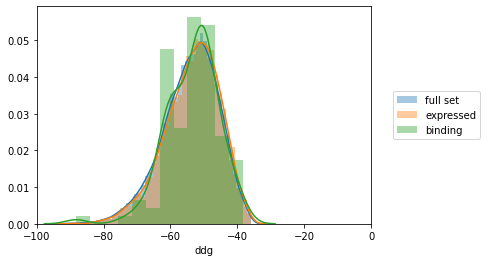

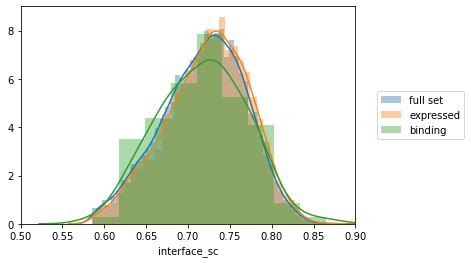

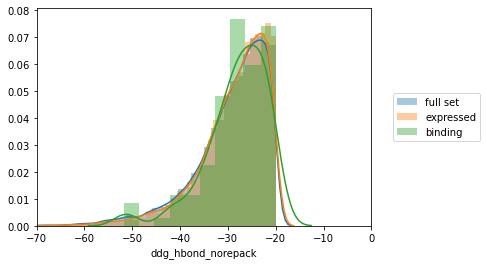

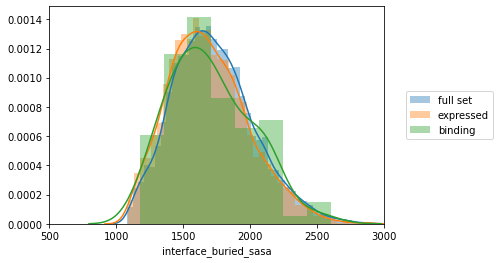

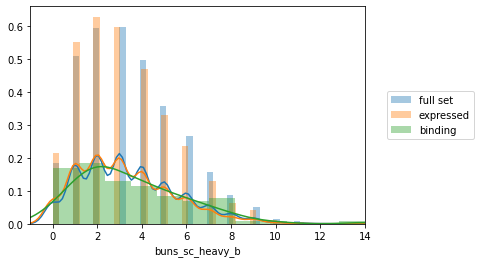

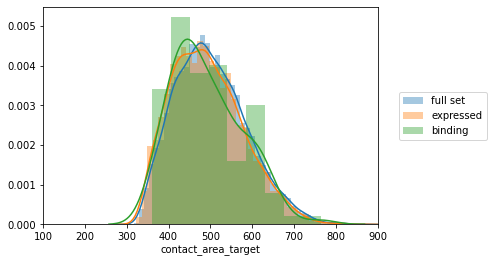

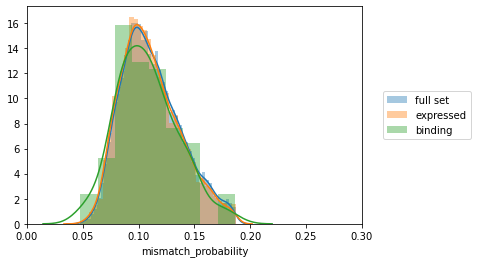

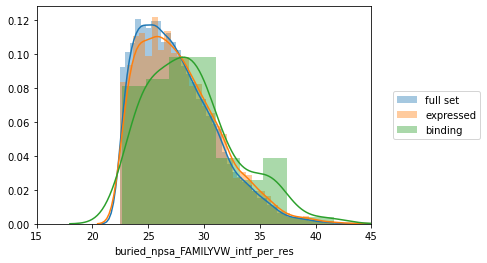

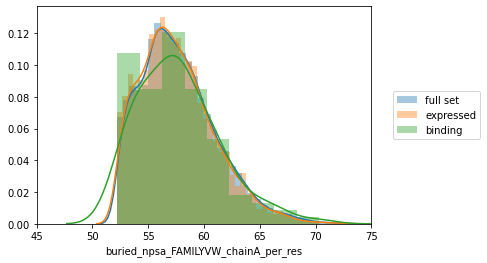

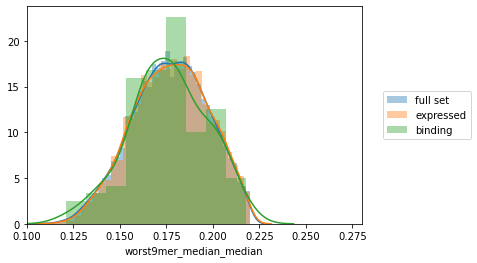

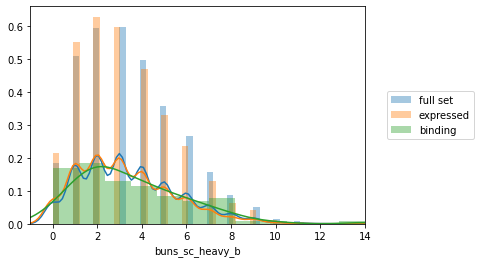

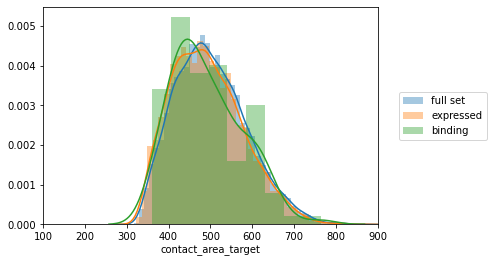

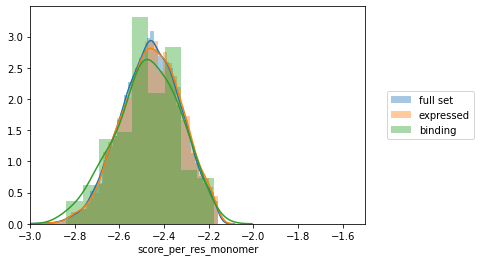

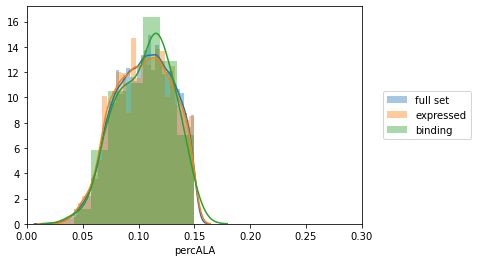

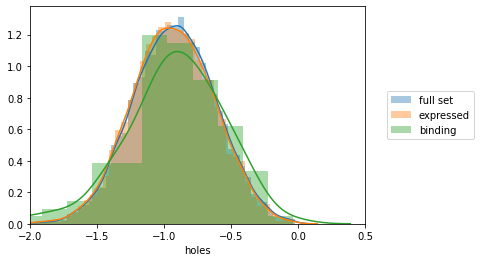

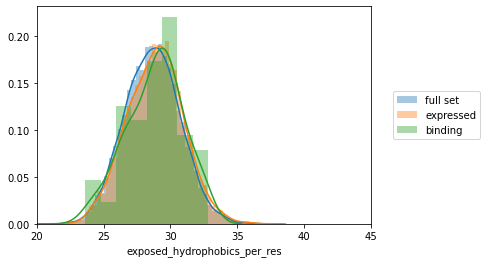

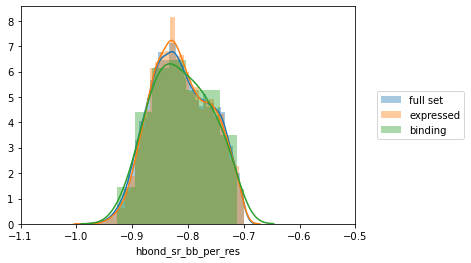

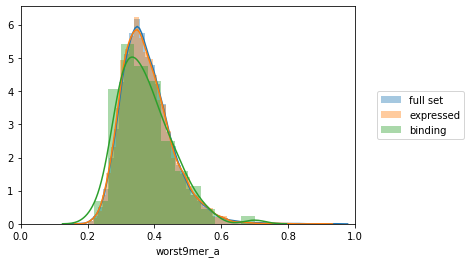

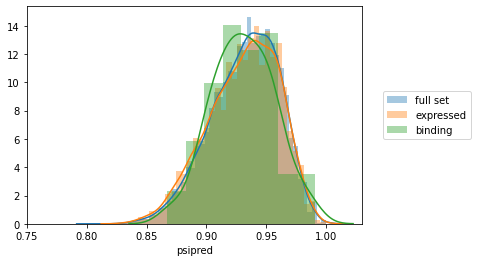

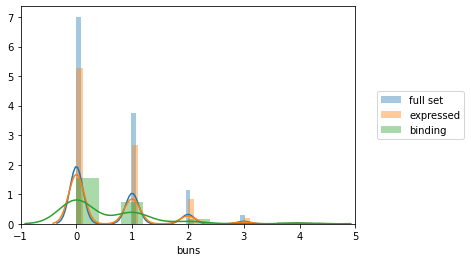

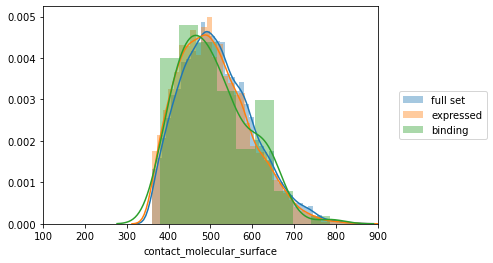

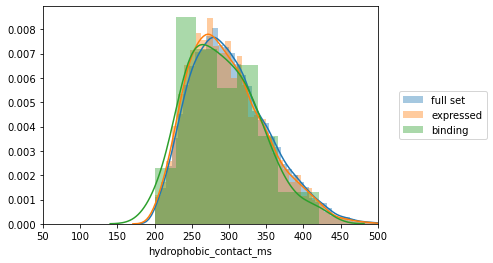

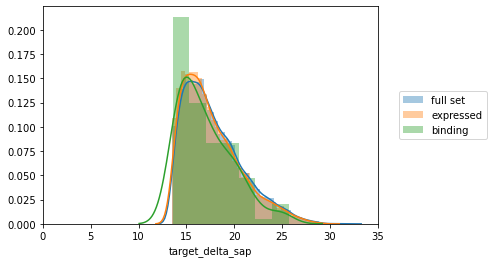

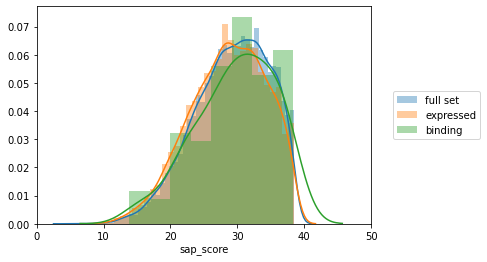

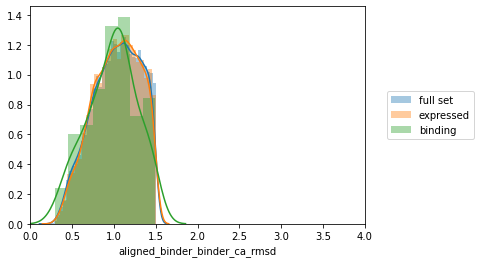

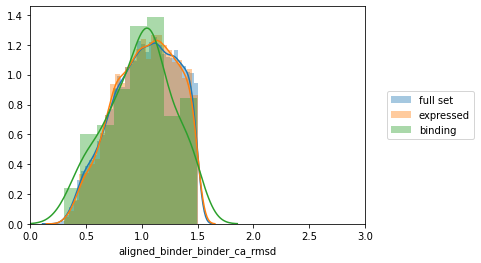

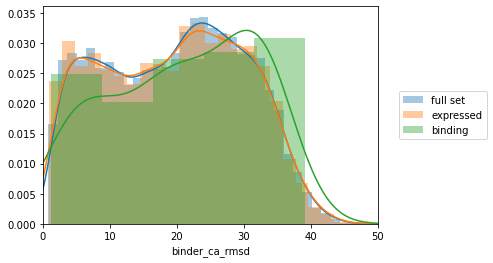

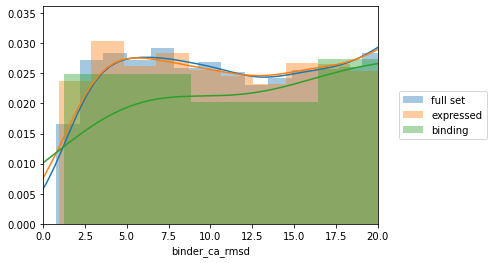

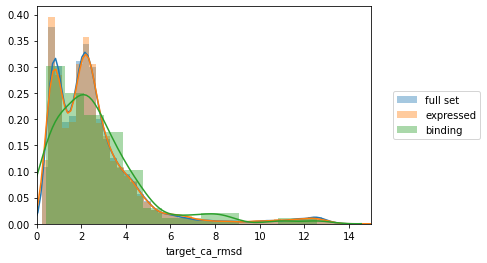

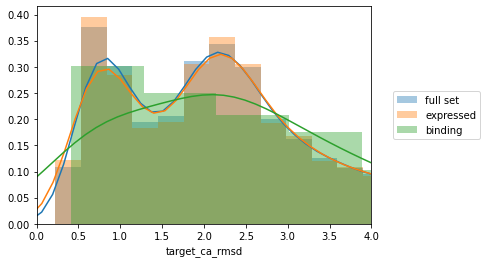

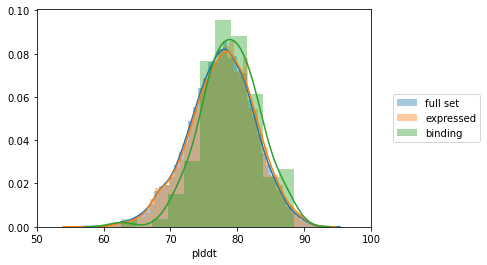

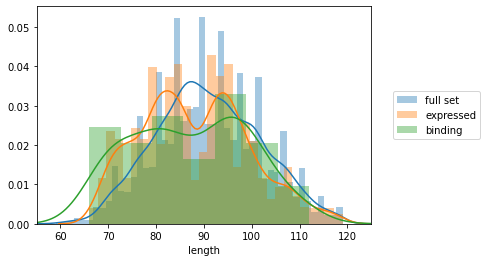

In [236]:
datasets = [final_df,expressed,binding]
ds_names = ['full set', 'expressed','binding']


filts = ["ddg", "interface_sc", "ddg_hbond_norepack", "interface_buried_sasa", "buns_sc_heavy_b", \
         "contact_area_target", "mismatch_probability", "buried_npsa_FAMILYVW_intf_per_res", \
         "buried_npsa_FAMILYVW_chainA_per_res", "worst9mer_median_median", \
         "buns_sc_heavy_b", "contact_area_target", "score_per_res_monomer", \
         "percALA", "holes", "exposed_hydrophobics_per_res", "hbond_sr_bb_per_res", "worst9mer_a", "psipred", \
         "buns", "contact_molecular_surface", "hydrophobic_contact_ms", "target_delta_sap", \
         "sap_score","aligned_binder_binder_ca_rmsd","aligned_binder_binder_ca_rmsd","binder_ca_rmsd",\
         "binder_ca_rmsd","target_ca_rmsd","target_ca_rmsd","plddt","length"]

ranges = [(-100,0),(0.5,0.9),(-70,0),(500,3000),(-1,14),(100,900),(0,0.3),(15,45),(45,75),(0.10,0.28),\
          (-1,14),(100,900),(-3,-1.5),(0,0.3),(-2,0.5),(20,45),(-1.1,-.5),(0,1),(0.75,1.03),(-1,5),(100,900),\
         (50,500),(0,35),(0,50),(0,4),(0,3),(0,50),(0,20),(0,15),(0,4),(50,100),(55,125)]

for fi,filt in enumerate(filts):
    for d,ds in enumerate(datasets):
        if filt in ds.columns:
            temp_list = [x for x in ds[filt]]
            temp_list = [x for x in temp_list if math.isnan(x) == False]
            if all(isinstance(e, (int, float)) for e in temp_list):
                if ds_names[d] == 'sequenced':
                    sns.distplot(temp_list,label=ds_names[d],bins=11)
                else:
                    sns.distplot(temp_list,label=ds_names[d])
    plt.legend()
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
    plt.xlim(ranges[fi][0],ranges[fi][1])
    plt.xlabel(filt)
    
    plt.show()